# Sequential Gaussian simulation (unconditional)


>**Note:** This notebook is inspired from the notebook [ex_geosclassic_2d.ipynb](https://github.com/randlab/geone/blob/master/examples/ex_geosclassic_2d.ipynb) by Julien Straubhaar.

In this notebook, we will learn how to perform Sequential Gaussian Simulation (SGS) when no conditioning data are available.

First of all, import the required modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# import package 'geone'
import geone as gn

## Definition of a variogram model

The next step is to define a variogram (covariance) model. For the moment, we can start with a variogram with no anysotropy and no nugget effect.

Later on, we will try by changing the radius ('r') along different directions, that can be defined different from 0 using the argument `angle`. We will also try o add a value $>0$ for the weight `w` related to the nugget effect, and also other variogram models than the 'spherical' (try for example 'gaussian' or 'exponentian'). See the documentation related to `CovModel2D` for more information.

In [2]:
cov_model = gn.covModel.CovModel2D(elem=[
    ('spherical', {'w':5., 'r':[150,150]}), # elementary contribution
    ('nugget', {'w':0.0})                    # elementary contribution
    ], name='model-2D')


## Grid definition

As for Kriging, we need to define the points where we want the values to be simulated (estimated) with SGS. In this case we need a 2D grid. For example, one can use

In [3]:
nx, ny = 220, 230  # number of cells
dx, dy = 1.0, 1.0  # cell unit
ox, oy = 0.0, 0.0  # origin

dimension = (nx, ny)
spacing = (dx, dy)
origin = (ox, oy)


## SGS simulation

We now enter into the "core" of our notebook, where the SGS will be performed.

For the moment, keep the number of realizations low (for example `nreal = 3`), to check if everithing works fine. Later on, we can set this value to a higher number, for example `100`.

In [4]:
nreal = 3
np.random.seed(321)
geosclassic_output = gn.geosclassicinterface.simulate2D(cov_model, dimension, spacing, origin, 
                                                        method='ordinary_kriging', 
                                                        searchRadiusRelative=3.0, nneighborMax=12,
                                                        nreal=nreal)

Geos-Classic running... [VERSION 2.0 / BUILD NUMBER 20230914 / OpenMP 11 thread(s)]
Geos-Classic run complete


The syntax to retrieve the results of our simulation from the return value provided by `simulate2D` is the following

In [ ]:
# Retrieve the realizations
simul = geosclassic_output['image']

You can explore the content of the output, which is a `Img object`, that is an image object (1D, 2D, 3D...) defined within the module `geone`.

On the output, you can compute some mean values, or a standard deviation, pixel wise.

In [ ]:
# Compute mean and standard deviation (pixel-wise)
simul_mean = gn.img.imageContStat(simul, op='mean')
simul_std = gn.img.imageContStat(simul, op='std')

To plot one of of the realizations, you can use the following line (where `iv=2` means the 2nd realization)

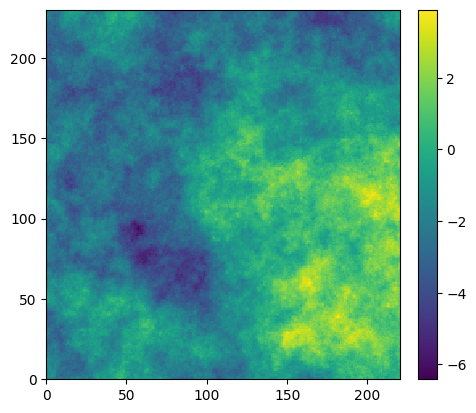

In [9]:
 gn.imgplot.drawImage2D(simul, iv=2)

You can also plot the mean value over many realizations... this will be more interesting when conditioning data are used and when many realizations are computed.

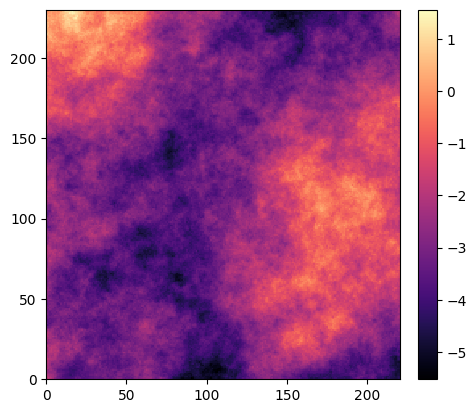

In [8]:
gn.imgplot.drawImage2D(simul_mean, cmap="magma")